In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in Adult.csv for analysis

In [26]:
adult_df = pd.read_csv("adult.csv")
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## EDA

We will use this data set to see if we can determine what are the main features that can be used to predict income

In [27]:
# Let's get information about the data set
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### The data consists of 48842 entries and 15 columns
The data consists of two types: int64 and objects

In [28]:
adult_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842,NaN,NaN,NaN,38.6436,13.7105,17,28,37,48,90
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842,NaN,NaN,NaN,189664,105604,12285,117550,178144,237642,1.4904e+06
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842,NaN,NaN,NaN,10.0781,2.57097,1,9,10,12,16
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The income column consists of two entries >50K and <=50K. We will see if we can use the features to predict whether income is in the higher category or lower category

In [29]:
import seaborn as sns

#### Gender
Lets see if there is any gender bias in the income:

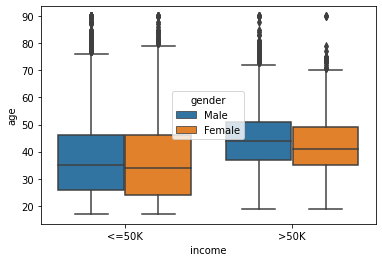

In [30]:
ax = sns.boxplot(x = 'income', y = 'age', hue= 'gender', data = adult_df)
#ax = sns.boxplot(x=adult_df['fnlwgt'])

Above we plotted age vs income categories split for women and men. In both categories of income the women were youger in age. Not clear if this is significant, but can be explored further. Also the data shows that unsurprisingly olders workers earn more.

#### Let's also look at the age distribution as a histogram:


<AxesSubplot:xlabel='age', ylabel='Count'>

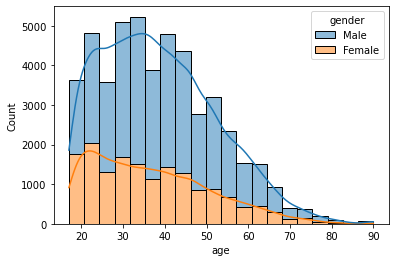

In [31]:
sns.histplot(x='age', data = adult_df, kde = True, hue = 'gender', multiple = 'stack', bins = 20)

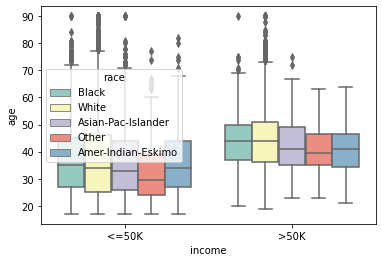

In [32]:
ax = sns.boxplot(x = 'income', y = 'age', hue= 'race', data = adult_df, palette = 'Set3')

#### Education:
There are 16 unique categories of education. We may reduce these to fewer, but let's look at the data:

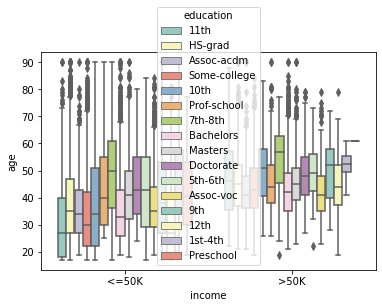

In [33]:
ax = sns.boxplot(x = 'income', y = 'age', hue= 'education', data = adult_df, palette = 'Set3')

The above is uninformative. Would reduce the number of categories significantly to: Some_Schooling, Some_College, Graduate, Post_Graduate. 

#### Pairplot

<Figure size 720x360 with 0 Axes>

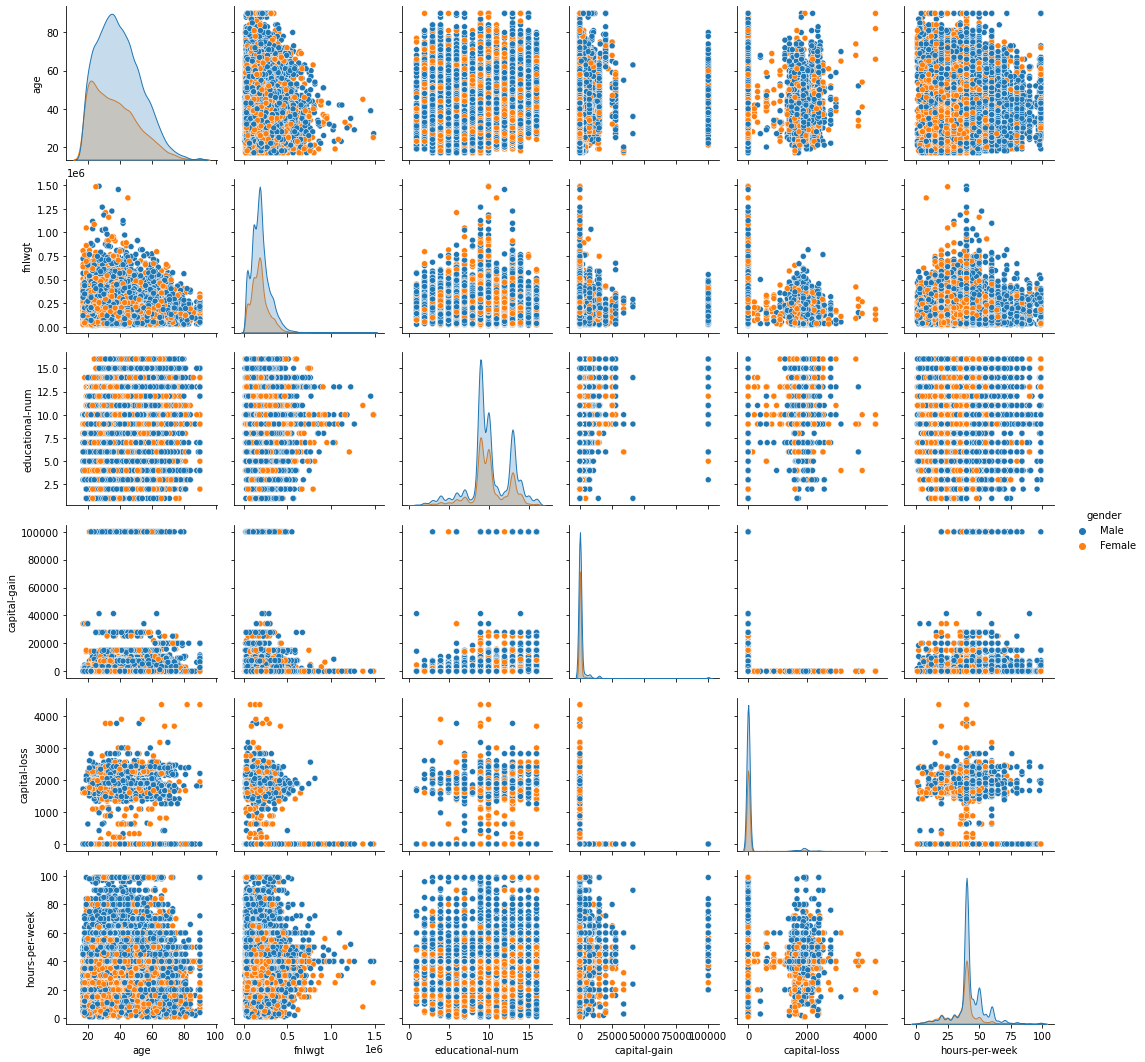

In [34]:
plt.figure(figsize = (10,5))
sns.pairplot(adult_df, hue='gender')
plt.show()

### Lets replace income <=50K with 0 and income >50K with 1 and try to predict income

In [35]:
print(adult_df.head(10))
adult_df['income'] = adult_df['income'].map({'<=50K': 0, '>50K':1})
adult_df.head(20)

   age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


In [36]:
adult_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842,NaN,NaN,NaN,38.6436,13.7105,17,28,37,48,90
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842,NaN,NaN,NaN,189664,105604,12285,117550,178144,237642,1.4904e+06
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842,NaN,NaN,NaN,10.0781,2.57097,1,9,10,12,16
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48792,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,0
48793,20,Private,270436,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,0
48794,46,Private,42972,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,1
48795,40,Private,142657,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,45,United-States,0
48796,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,0
48797,30,Private,176175,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,White,Female,0,0,24,United-States,0
48798,36,Private,131459,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
48799,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,1
48800,46,Private,364548,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,1
48801,27,Private,177398,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,64,United-States,0


#### Identify numeric and categorical variables


In [37]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [50]:
n_features = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week','income']  # numeric
c_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native'] # categorical

<AxesSubplot:xlabel='income', ylabel='count'>

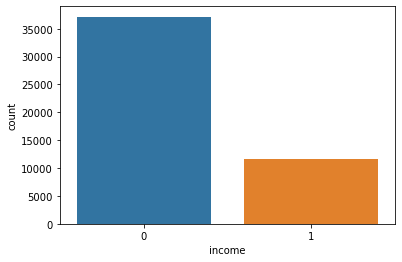

In [51]:
# Count number of people with <=50K and >50K income

sns.countplot(x = 'income', data = adult_df, label= 'Count')


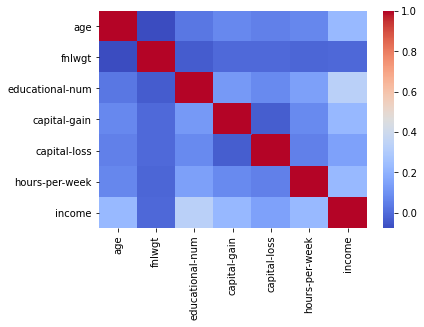

In [55]:
#Correlation 
_ = sns.heatmap(adult_df[n_features].corr(), cmap = 'coolwarm')
plt.show()

In [56]:
adult_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### There are no missing values

### Next we can rationalize some of the categorical features
For example the marital-stauts column contains "never-married", "Divorced","Separated","Widowed": These could all be coded as "Single". Thus the column would become bivariate. 

Also the education column could be rationalized to contain fewer labels.

These features would be more amenable to building a classification model.